In [10]:
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt

In [11]:
def graph(r_channel, g_channel, b_channel):
    rgb_image = np.dstack((r_channel, g_channel, b_channel))
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

In [13]:
def realign(base_channel, add_channel):
    min_diff = 1 << 30
    best_dr, best_dc = None, None
    y_len = add_channel.shape[0]
    x_len = add_channel.shape[1]
    buff_base = 15
    mid_base_channel = base_channel[buff_base:-buff_base, buff_base:-buff_base]
    
    for off_y in range(-buff_base, buff_base + 1):
        for off_x in range(-buff_base, buff_base + 1):
            shifted_add = add_channel[buff_base+off_y:y_len-buff_base+off_y, buff_base+off_x:x_len-buff_base+off_x]
            diff = np.sum((mid_base_channel - shifted_add) ** 2)
            if diff < min_diff:
                best_dr, best_dc = off_y, off_x
                min_diff = diff
    
    print(best_dr, best_dc)
            # curr_sum = 0
            # for row in range(15, base_channel.shape[0] - 15):
            #     for col in range(15, base_channel.shape[1] - 15):
                    
            #         curr_sum += (add_channel[off_y + row][off_x + col] - base_channel[row][col]) ** 2

            # if curr_sum < min_diff:
            #     best_dr, best_dc = off_y, off_x
            #     min_diff = curr_sum

    return np.roll(add_channel, (-best_dr, -best_dc), axis=(0, 1))

In [14]:
def partition_image(image, black_prop=0.04):
    glob_col_start_ind = 0
    glob_col_end_ind = float('inf')
    white_buff = int(image.shape[0] * 0.1)
    
    for row_ind in range(image.shape[0])[white_buff:-white_buff]:
        col_ind = 0
        while image[row_ind][col_ind] > 0.9:
            col_ind += 1
        glob_col_start_ind = max(glob_col_start_ind, col_ind)

    for row_ind in range(image.shape[0])[white_buff:-white_buff]:
        col_ind = image.shape[1] - 1
        while image[row_ind][col_ind] > 0.9:
            col_ind -= 1
        glob_col_end_ind = min(glob_col_end_ind, col_ind)

    glob_row_start_ind = 0
    glob_row_end_ind = float('inf')

    for col_ind in range(image.shape[1])[white_buff:-white_buff]:
        row_ind = 0
        while image[row_ind][col_ind] > 0.5:
            row_ind += 1
       # print(row_ind)
        glob_row_start_ind = max(glob_row_start_ind, row_ind)

    for col_ind in range(image.shape[1])[white_buff:-white_buff]:
        row_ind = image.shape[0] - 1
        while image[row_ind][col_ind] > 0.5:
            row_ind -= 1
        glob_row_end_ind = min(glob_row_end_ind, row_ind)
   
    print(glob_col_start_ind, glob_col_end_ind, glob_row_start_ind, glob_row_end_ind)
    cropped_im = image[glob_row_start_ind:glob_row_end_ind, glob_col_start_ind:glob_col_end_ind]
    
    height = np.floor(cropped_im.shape[0] / 3.0).astype(int)
    b = cropped_im[:height]
    g = cropped_im[height: 2*height]
    r = cropped_im[2*height: 3*height]

    buff = int(b.shape[1] * black_prop)
  #  print(buff)
    #buff = 12
   # print(buff)
    #c_buff = b.shape[1] * black_prop
    
    b = b[buff:-buff, buff:-buff]
    g = g[buff:-buff, buff:-buff]
    r = r[buff:-buff, buff:-buff]
    graph(r, g, b)
    return r, g, b

In [16]:
def main_func(image_path, black_prop=0.04):
    im = skio.imread(image_path)
    print('here', im.shape)
    im = sk.img_as_float(im)
    r, g, b = partition_image(im, black_prop)
    roll_g = realign(b, g)
    roll_r = realign(b, r)
    graph(roll_r, roll_g, b)

here (1024, 390)
9 381 9 1012


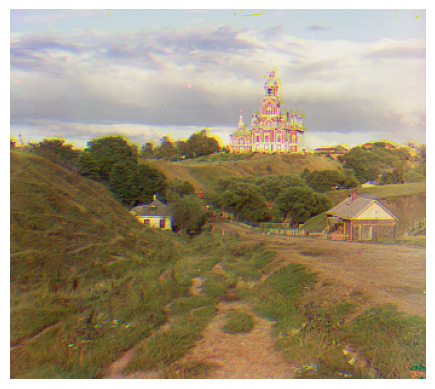

2 -2
2 -3


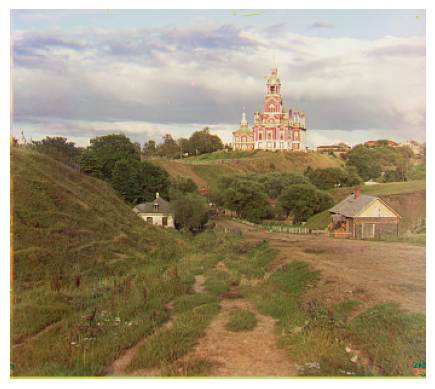

In [17]:
main_func('cs180 proj1 data\cathedral.jpg')

here (1024, 391)
9 383 11 1011


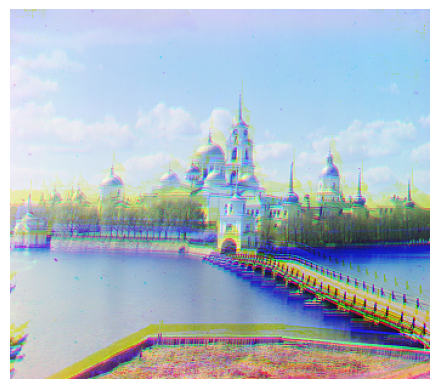

11 -2
13 -2


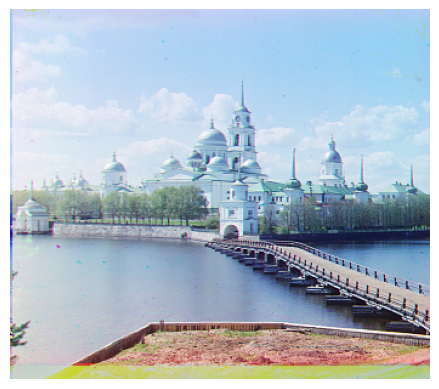

In [18]:
main_func('cs180 proj1 data\monastery.jpg')

here (1024, 396)
8 387 7 1018


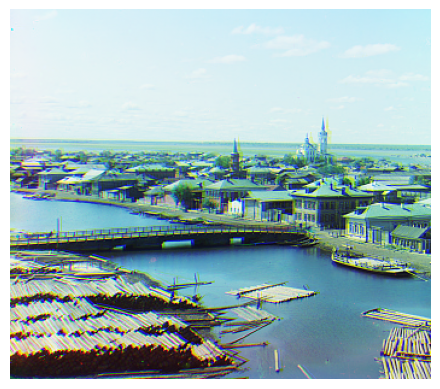

buff base 15
1 -3
buff base 15
2 -3


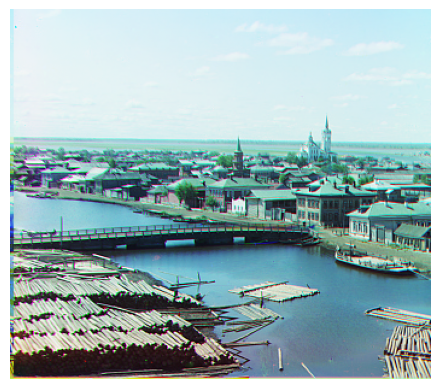

In [8]:
main_func(r"cs180 proj1 data\tobolsk.jpg")

here (9607, 3634)
45 3551 68 9547


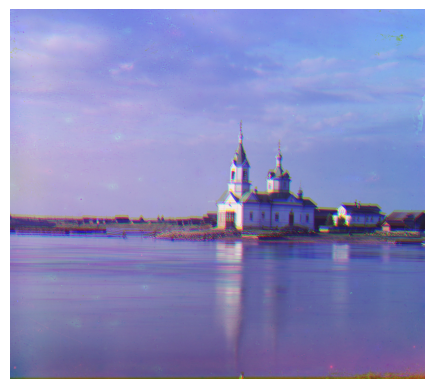

buff base 143


KeyboardInterrupt: 

In [9]:
main_func(r"cs180 proj1 data\church.tif")